# 서울시 교통사고 상해예측 & 위험 요인 분석

2022년도 데이터를 활용해 2023년도 교통사고 상해 예측

## 데이터 전처리

#### Data load

In [1]:
import pandas as pd

train = pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\data\2022서울시교통사고현황-데이터셋.csv",encoding = 'euc-kr')
test = pd.read_csv(r"C:\Users\thdfy\OneDrive\바탕 화면\Datamining_Teampro\data\2023서울시교통사고현황-데이터셋.csv",encoding = 'euc-kr')


In [2]:
train.drop(columns=['사고번호'], inplace = True)
test.drop(columns=['사고번호'], inplace = True)

In [3]:
train['사고유형'] = train['사고유형'].str.split(' - ').str[0]
test['사고유형'] = test['사고유형'].str.split(' - ').str[0]

In [4]:
train['사고유형'].value_counts()

사고유형
차대차     24898
차대사람     7807
차량단독      993
Name: count, dtype: int64

In [16]:
train['사망자수'].value_counts()

사망자수
0    33483
1      209
2        6
Name: count, dtype: int64

In [15]:
test['ECLO'].mean()

4.335275502055544

In [10]:
train['중상자수'].value_counts()

중상자수
0    26479
1     6794
2      357
3       51
4       11
6        3
5        2
7        1
Name: count, dtype: int64

In [20]:
train['경상자수'].value_counts()

경상자수
1     19667
0      8137
2      4146
3      1118
4       387
5       139
6        50
7        18
8        13
9         7
10        6
11        3
13        3
12        2
17        1
25        1
Name: count, dtype: int64

In [18]:
train['부상신고자수'].value_counts()

부상신고자수
0    30796
1     2649
2      197
3       37
4       11
5        5
6        2
7        1
Name: count, dtype: int64

In [19]:
train['법규위반'].value_counts()

법규위반
안전운전불이행      19833
안전거리미확보       4447
신호위반          3783
기타            1379
보행자보호의무위반     1218
교차로운행방법위반     1081
중앙선침범          750
직진우회전진행방해      533
차로위반           422
불법유턴           252
Name: count, dtype: int64

예측 시점에 알 수 없는 정보들은 삭제. <br>
예측 시점에 알 수 있는 정보 : 사고일시, 요일, 기상상태, 시군구, 도로형태, 노면상태, 사고유형
예측 시점에 알 수 없는 정보:
 '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
 '가해운전자 차종', '가해운전자 성별',
'가해운전자 연령', '가해운전자 상해정도',
'피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
'피해운전자 상해정도'

In [443]:
test_drop = ['사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '법규위반',
 '가해운전자 차종', '가해운전자 성별',
'가해운전자 연령', '가해운전자 상해정도',
'피해운전자 차종', '피해운전자 성별','피해운전자 연령',
'피해운전자 상해정도']
test.drop(columns=test_drop, inplace = True) 

In [444]:
test.columns

Index(['사고일시', '요일', '시군구', '사고유형', '노면상태', '기상상태', '도로형태', 'ECLO'], dtype='object')

In [445]:
train.columns

Index(['사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형',
       '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
       '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', 'ECLO'],
      dtype='object')

In [446]:
train.head()

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,ECLO
0,2022년 1월 1일 00시,토요일,서울특별시 중구 충무로5가,경상사고,0,0,1,0,차대차,안전운전불이행,...,단일로 - 기타,승용,남,63세,상해없음,승용,남,67세,경상,3
1,2022년 1월 1일 00시,토요일,서울특별시 송파구 신천동,중상사고,0,2,0,0,차대사람,보행자보호의무위반,...,단일로 - 기타,승용,남,69세,상해없음,보행자,여,16세,중상,10
2,2022년 1월 1일 02시,토요일,서울특별시 금천구 독산동,부상신고사고,0,0,0,1,차량단독,안전운전불이행,...,단일로 - 기타,이륜,남,24세,부상신고,NaN,NaN,NaN,NaN,1
3,2022년 1월 1일 02시,토요일,서울특별시 강동구 천호동,경상사고,0,0,2,0,차대차,안전운전불이행,...,단일로 - 기타,승용,여,61세,상해없음,승용,남,61세,경상,6
4,2022년 1월 1일 06시,토요일,서울특별시 강남구 역삼동,중상사고,0,1,0,0,차대사람,안전운전불이행,...,교차로 - 교차로안,승용,남,62세,상해없음,보행자,여,61세,중상,5


### 1. 날짜, 시간 정보 생성

In [447]:
time_pattern = r'(\d{4})년 (\d{1,2})월 (\d{1,2})일 (\d{1,2})시'

train[['연', '월', '일', '시간']] = train['사고일시'].str.extract(time_pattern)
train[['연', '월', '일', '시간']] = train[['연', '월', '일', '시간']].apply(pd.to_numeric)

test[['연', '월', '일', '시간']] = test['사고일시'].str.extract(time_pattern)
test[['연', '월', '일', '시간']] = test[['연', '월', '일', '시간']].apply(pd.to_numeric)

#### 1.1 공휴일 컬럼 생성

In [448]:
import pandas as pd
from pandas import Timestamp, DateOffset
from workalendar.asia import SouthKorea
# = 공휴일 column 추가 =
def is_holiday(year, month, day):
  cal = SouthKorea()
  return cal.is_holiday(Timestamp(year, month, day))

def classify_day(year, month, day):
  date = Timestamp(year, month, day)
  if date.dayofweek < 5 and not is_holiday(year, month, day):
    return 0
  else:
    return 1

train['Holiday'] = train.apply(lambda row: classify_day(row['연'], row['월'], row['일']), axis=1)
train.drop(columns=['사고일시','일','연'], inplace = True) # 정보 추출이 완료된 '사고일시','일','요일','연' 컬럼은 제거합니다

test['Holiday'] = test.apply(lambda row: classify_day(row['연'], row['월'], row['일']), axis=1)
test.drop(columns=['사고일시','일','연'], inplace = True) # 정보 추출이 완료된 '사고일시','일','요일','연' 컬럼은 제거합니다

#### 1.2 봄, 여름, 가을, 겨울, 기상학적으로 구분함

In [449]:
# == 봄, 여름, 가을, 겨울, 기상학적으로 구분함 ==
def categorize_season(month):
    if month in [3, 4, 5]:
        return '봄'

    elif month in [6, 7, 8]:
        return '여름'

    elif month in [9, 10, 11]:
        return '가을'

    else:
        return '겨울'

train['계절'] = train['월'].apply(categorize_season)
test['계절'] = test['월'].apply(categorize_season)

1.3 출 퇴근 시간(공휴일까지 고려) ==  평일에는 7~9, 18~20시까지 출퇴근, 공휴일에는 18~22시까지 교통량 증가로 확인

In [450]:
def rush_hour(hour, holiday):
    if (holiday == 0 and hour in [7, 8, 9, 18, 19, 20]) or (holiday == 1 and hour in [18, 19, 20, 21, 22]):
        return "Rush"
    else:
        return "NoRush"

train['출퇴근'] = train.apply(lambda row: rush_hour(row['시간'], row['Holiday']), axis=1)  
test['출퇴근'] = test.apply(lambda row: rush_hour(row['시간'], row['Holiday']), axis=1)

### 2. 시군구 분리

In [451]:
location_pattern = r'(\S+) (\S+) (\S+)'

train[['도시', '구', '동']] = train['시군구'].str.extract(location_pattern)
train = train.drop(columns=['시군구'])

test[['도시', '구', '동']] = test['시군구'].str.extract(location_pattern)
test = test.drop(columns=['시군구'])

### 3. 도로형태 분리

In [452]:
road_pattern = r'(.+) - (.+)'
train[['도로형태1', '도로형태2']] = train['도로형태'].str.extract(road_pattern)
train = train.drop(columns=['도로형태'])
test[['도로형태1', '도로형태2']] = test['도로형태'].str.extract(road_pattern)
test = test.drop(columns=['도로형태'])

### 4. 나이 변수 전처리

In [453]:
import numpy as np
def age_transform(x):
  try:
    ret = int(x.split('세')[0])
  except:
    ret = np.NaN

  return ret

In [454]:
train['가해운전자 연령'] = train['가해운전자 연령'].apply(lambda x:age_transform(x))
train['피해운전자 연령'] = train['피해운전자 연령'].apply(lambda x:age_transform(x))

#### 4.1 지역별 가해운전자 & 피해운전자 평균 연령 추출

In [455]:
age_mean = train[['도시','구','동','가해운전자 연령','피해운전자 연령']].groupby(['도시', '구','동']).mean()
age_mean.columns = ['가해운전자 평균연령','피해운전자 평균연령']

In [456]:
train = pd.merge(train, age_mean, how='left', on=['도시', '구','동'])
test = pd.merge(test, age_mean, how='left', on=['도시', '구','동'])

In [457]:
train.head()

,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,...,Holiday,계절,출퇴근,도시,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,토요일,경상사고,0,0,1,0,차대차,안전운전불이행,건조,맑음,...,1,겨울,NoRush,서울특별시,중구,충무로5가,단일로,기타,69.666667,54.000000
1,토요일,중상사고,0,2,0,0,차대사람,보행자보호의무위반,건조,맑음,...,1,겨울,NoRush,서울특별시,송파구,신천동,단일로,기타,48.677852,43.947712
2,토요일,부상신고사고,0,0,0,1,차량단독,안전운전불이행,건조,맑음,...,1,겨울,NoRush,서울특별시,금천구,독산동,단일로,기타,50.306818,47.347826
3,토요일,경상사고,0,0,2,0,차대차,안전운전불이행,건조,맑음,...,1,겨울,NoRush,서울특별시,강동구,천호동,단일로,기타,51.441441,47.843750
4,토요일,중상사고,0,1,0,0,차대사람,안전운전불이행,건조,맑음,...,1,겨울,NoRush,서울특별시,강남구,역삼동,교차로,교차로안,45.877792,42.001300


In [458]:
test.head()

,요일,사고유형,노면상태,기상상태,ECLO,월,시간,Holiday,계절,출퇴근,도시,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,일요일,차대차,건조,맑음,6,1,0,1,겨울,NoRush,서울특별시,성동구,성수동2가,교차로,교차로안,49.074324,44.646259
1,일요일,차대차,건조,흐림,3,1,0,1,겨울,NoRush,서울특별시,관악구,신림동,교차로,교차로안,48.111283,43.913112
2,일요일,차대사람,건조,맑음,5,1,1,1,겨울,NoRush,서울특별시,은평구,대조동,단일로,기타,47.247059,47.564706
3,일요일,차대차,건조,맑음,5,1,2,1,겨울,NoRush,서울특별시,성북구,보문동7가,교차로,교차로안,49.357143,41.142857
4,일요일,차대차,건조,맑음,3,1,2,1,겨울,NoRush,서울특별시,동작구,대방동,단일로,기타,48.521429,46.840909


In [459]:
train.columns

Index(['요일', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '사고유형', '법규위반', '노면상태',
       '기상상태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', 'ECLO', '월', '시간', 'Holiday',
       '계절', '출퇴근', '도시', '구', '동', '도로형태1', '도로형태2', '가해운전자 평균연령',
       '피해운전자 평균연령'],
      dtype='object')

In [460]:
test.columns

Index(['요일', '사고유형', '노면상태', '기상상태', 'ECLO', '월', '시간', 'Holiday', '계절', '출퇴근',
       '도시', '구', '동', '도로형태1', '도로형태2', '가해운전자 평균연령', '피해운전자 평균연령'],
      dtype='object')

### 5. 불필요한 열 제거, 상관계수가 높은 열 제거

In [461]:
train_drop = [ '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
        '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도',  '월', '시간', 
         '도시','법규위반' ]
train.drop(columns=train_drop, inplace = True) 

In [462]:
test_drop = ['월', '시간', '도시']
test.drop(columns=test_drop, inplace = True) 

In [463]:
train.columns

Index(['요일', '사고유형', '노면상태', '기상상태', 'ECLO', 'Holiday', '계절', '출퇴근', '구', '동',
       '도로형태1', '도로형태2', '가해운전자 평균연령', '피해운전자 평균연령'],
      dtype='object')

In [464]:
test.columns

Index(['요일', '사고유형', '노면상태', '기상상태', 'ECLO', 'Holiday', '계절', '출퇴근', '구', '동',
       '도로형태1', '도로형태2', '가해운전자 평균연령', '피해운전자 평균연령'],
      dtype='object')

In [465]:
train.shape, test.shape

((33698, 14), (33811, 14))

### 인코딩

In [466]:
# # == 기상상태, 노면상태, 계절 -> 원핫인코딩 ==
# train = pd.get_dummies(train, columns = ['기상상태', '노면상태', '계절', '출퇴근'])
# test = pd.get_dummies(test, columns = ['기상상태', '노면상태', '계절', '출퇴근'])

In [430]:
# from sklearn.preprocessing import LabelEncoder

# categorical_features = list(train.dtypes[train.dtypes == "object"].index)
# # 추출된 문자열 변수 확인
# display(categorical_features)

# for i in categorical_features:
#     print(i)
#     le = LabelEncoder()
#     le=le.fit(train[i])
#     train[i]=le.transform(train[i])

#     for case in np.unique(test[i]):
#         if case not in le.classes_:
#             print('test case is not in classes')
#             le.classes_ = np.append(le.classes_, case)
#     test[i]=le.transform(test[i])

# display(train.head())
# display(test.head())

['요일', '사고유형', '노면상태', '기상상태', '계절', '출퇴근', '구', '동', '도로형태1', '도로형태2']

요일
사고유형
노면상태
기상상태
계절
출퇴근
구
동
test case is not in classes
test case is not in classes
test case is not in classes
test case is not in classes
test case is not in classes
test case is not in classes
test case is not in classes
도로형태1
도로형태2


,요일,사고유형,노면상태,기상상태,ECLO,Holiday,계절,출퇴근,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,5,1,0,2,3,1,1,0,23,402,2,5,69.666667,54.000000
1,5,0,0,2,10,1,1,0,17,244,2,5,48.677852,43.947712
2,5,2,0,2,1,1,1,0,7,92,2,5,50.306818,47.347826
3,5,1,0,2,6,1,1,0,1,387,2,5,51.441441,47.843750
4,5,0,0,2,5,1,1,0,0,267,0,3,45.877792,42.001300


,요일,사고유형,노면상태,기상상태,ECLO,Holiday,계절,출퇴근,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,4,1,0,2,6,1,1,0,15,210,0,3,49.074324,44.646259
1,4,1,0,5,3,1,1,0,4,233,0,3,48.111283,43.913112
2,4,0,0,2,5,1,1,0,21,81,2,5,47.247059,47.564706
3,4,1,0,2,5,1,1,0,16,161,0,3,49.357143,41.142857
4,4,1,0,2,3,1,1,0,11,79,2,5,48.521429,46.840909


### 모델 예측

In [467]:
train

,요일,사고유형,노면상태,기상상태,ECLO,Holiday,계절,출퇴근,구,동,도로형태1,도로형태2,가해운전자 평균연령,피해운전자 평균연령
0,토요일,차대차,건조,맑음,3,1,겨울,NoRush,중구,충무로5가,단일로,기타,69.666667,54.000000
1,토요일,차대사람,건조,맑음,10,1,겨울,NoRush,송파구,신천동,단일로,기타,48.677852,43.947712
2,토요일,차량단독,건조,맑음,1,1,겨울,NoRush,금천구,독산동,단일로,기타,50.306818,47.347826
3,토요일,차대차,건조,맑음,6,1,겨울,NoRush,강동구,천호동,단일로,기타,51.441441,47.843750
4,토요일,차대사람,건조,맑음,5,1,겨울,NoRush,강남구,역삼동,교차로,교차로안,45.877792,42.001300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33693,토요일,차대차,건조,맑음,3,1,겨울,NoRush,광진구,군자동,단일로,기타,48.794118,43.927536
33694,토요일,차대차,건조,맑음,3,1,겨울,NoRush,마포구,염리동,단일로,기타,44.304348,38.565217
33695,토요일,차대차,건조,맑음,1,1,겨울,NoRush,중랑구,면목동,단일로,기타,50.073684,48.165957
33696,토요일,차대차,건조,맑음,3,1,겨울,NoRush,구로구,구로동,교차로,교차로부근,50.936567,45.836502


차량단독 사고 유형 - RMSLE: 0.440327623484827, R²: -0.19514775112019556
차대차 사고 유형 - RMSLE: 0.44954780332960004, R²: -0.01770313484476982
차대사람 사고 유형 - RMSLE: 0.3458180488052681, R²: -0.03425475858895455


C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\3171522761.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['predict'] = model1.predict(X_test1)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\3171522761.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['predict'] = model2.predict(X_test2)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\3171522761.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

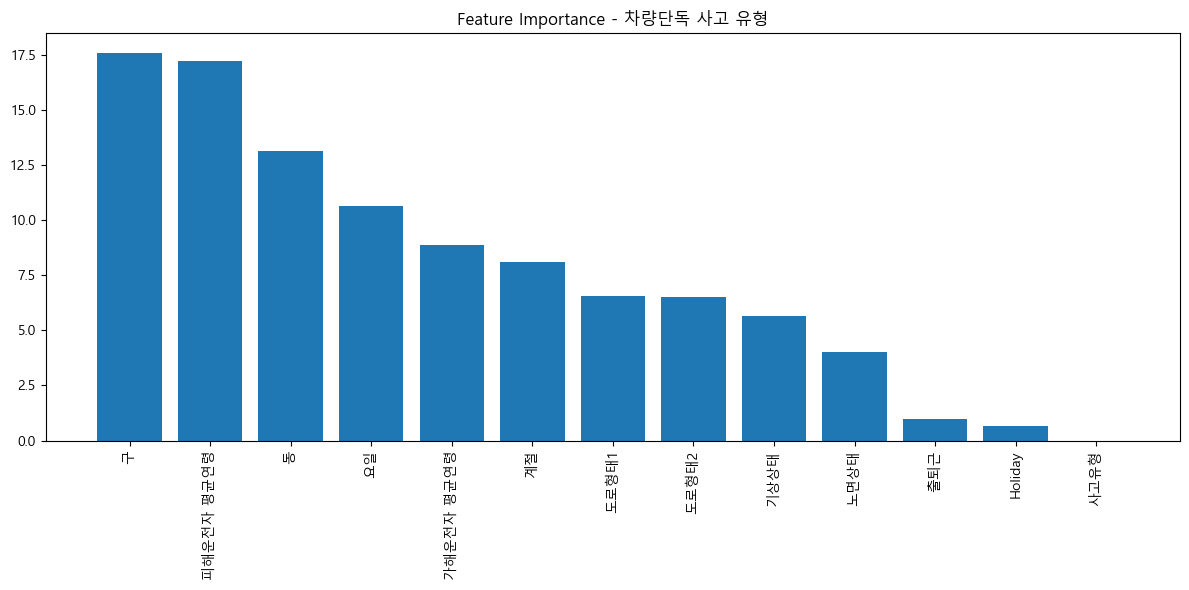

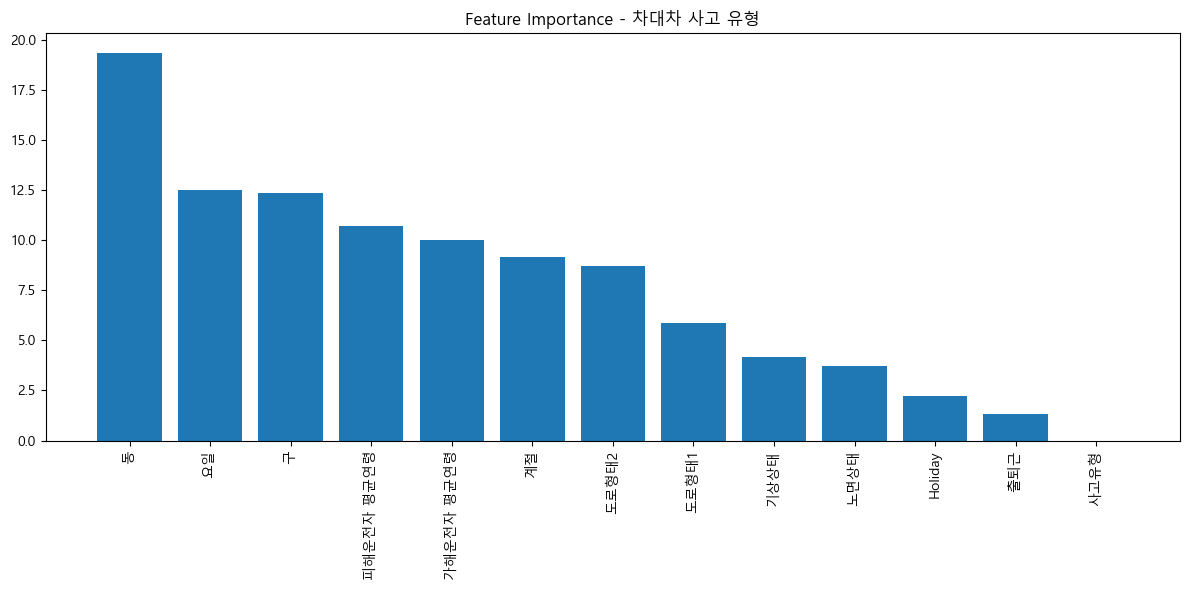

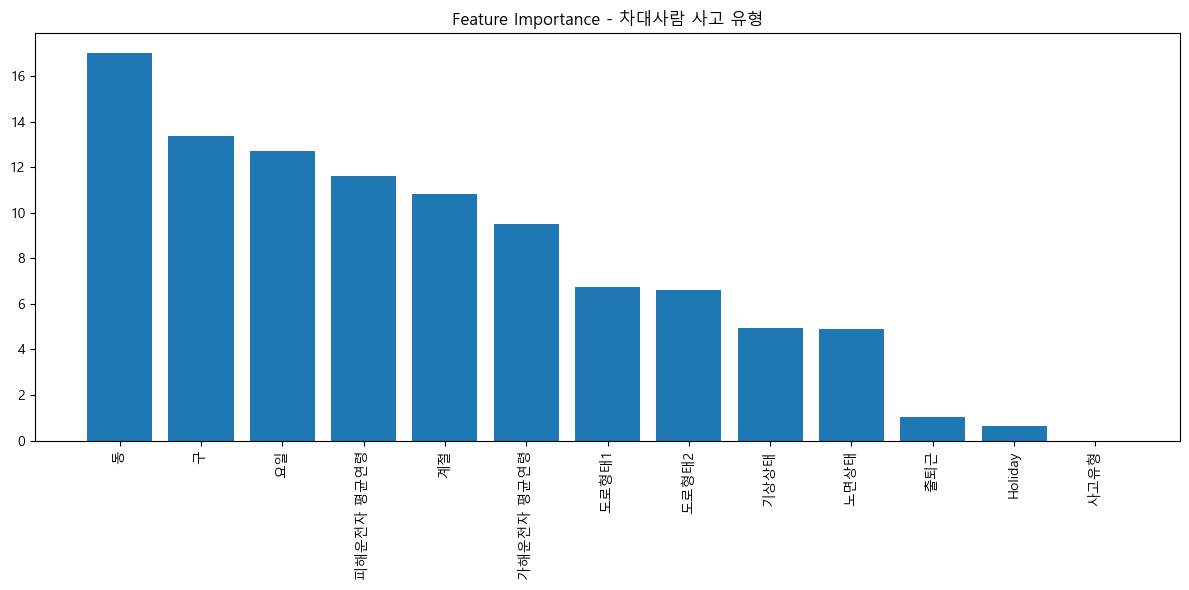

차량단독 사고 유형 (Test) - RMSLE: 0.440327623484827, R²: -0.19514775112019556
차대차 사고 유형 (Test) - RMSLE: 0.44954780332960004, R²: -0.01770313484476982
차대사람 사고 유형 (Test) - RMSLE: 0.3458180488052681, R²: -0.03425475858895455


In [471]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt


# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 사고 유형별로 데이터셋 분할 및 샘플링
train1 = train[train["사고유형"] == "차량단독"]  # 차량단독
train2 = train[train["사고유형"] == "차대차"]  # 차대차
train3 = train[train["사고유형"] == "차대사람"]  # 차대사람

test1 = test[test["사고유형"] == "차량단독"]
test2 = test[test["사고유형"] == "차대차"]
test3 = test[test["사고유형"] == "차대사람"]

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')
# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# CatBoost 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test, params, cat_features):
    model = CatBoostRegressor(random_seed=42, thread_count=-1, **params)
    model.fit(X_train, y_train, cat_features=cat_features, verbose=0)
    y_pred_test = model.predict(X_test)

    rmsle_value = rmsle(y_test, y_pred_test)
    r2_value = r2_score(y_test, y_pred_test)

    return model, rmsle_value, r2_value

# 범주형 피처 인덱스 추출
cat_features1 = np.where(X_train1.dtypes == object)[0]
cat_features2 = np.where(X_train2.dtypes == object)[0]
cat_features3 = np.where(X_train3.dtypes == object)[0]

# CatBoost 파라미터 설정
catboost_params1 = {
    'iterations': 6111,
    'od_wait': 609,
    'learning_rate': 0.04119744178592561,
    'reg_lambda': 5.488592836608496,
    'subsample': 0.9203846250162546,
    'random_strength': 14.883401811234684,
    'depth': 5,
    'min_data_in_leaf': 3,
    'leaf_estimation_iterations': 10,
    'bagging_temperature': 0.01789129283627206,
    'colsample_bylevel': 0.5972283837388589
}

catboost_params2 = {
    'iterations': 13411,
    'od_wait': 1144,
    'learning_rate': 0.021727882868213363,
    'reg_lambda': 21.015616790374914,
    'subsample': 0.878372685297051,
    'random_strength': 36.58060974949341,
    'depth': 7,
    'min_data_in_leaf': 7,
    'leaf_estimation_iterations': 9,
    'bagging_temperature': 0.05180927511974106,
    'colsample_bylevel': 0.579406682782964
}

catboost_params3 = {
    'iterations': 6500,
    'od_wait': 1641,
    'learning_rate': 0.039883471636645535,
    'reg_lambda': 8.723928583044282,
    'subsample': 0.8317293182421713,
    'random_strength': 22.481544108255296,
    'depth': 5,
    'min_data_in_leaf': 9,
    'leaf_estimation_iterations': 9,
    'bagging_temperature': 0.022614197973049137,
    'colsample_bylevel': 0.7882803255907027
}

# 모델 학습 및 평가
model1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1, catboost_params1, cat_features1)
model2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2, catboost_params2, cat_features2)
model3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3, catboost_params3, cat_features3)

print(f'차량단독 사고 유형 - RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1['predict'] = model1.predict(X_test1)
test2['predict'] = model2.predict(X_test2)
test3['predict'] = model3.predict(X_test3)

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.get_feature_importance()
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')

In [431]:
train['사고유형'].value_counts()

사고유형
1    24898
0     7807
2      993
Name: count, dtype: int64

In [432]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "c:/Windows/Fonts/malgun.ttf"  # Windows의 경우
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

차량단독 사고 유형 - RMSLE: 0.4439232547775895, R²: -0.22604149063073598
차대차 사고 유형 - RMSLE: 0.4954561004383916, R²: -0.21101295543038456
차대사람 사고 유형 - RMSLE: 0.3693595845180827, R²: -0.16818276201853766


C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\125597462.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.loc[:, 'predict'] = model1.predict(X_test1)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\125597462.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.loc[:, 'predict'] = model2.predict(X_test2)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\125597462.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

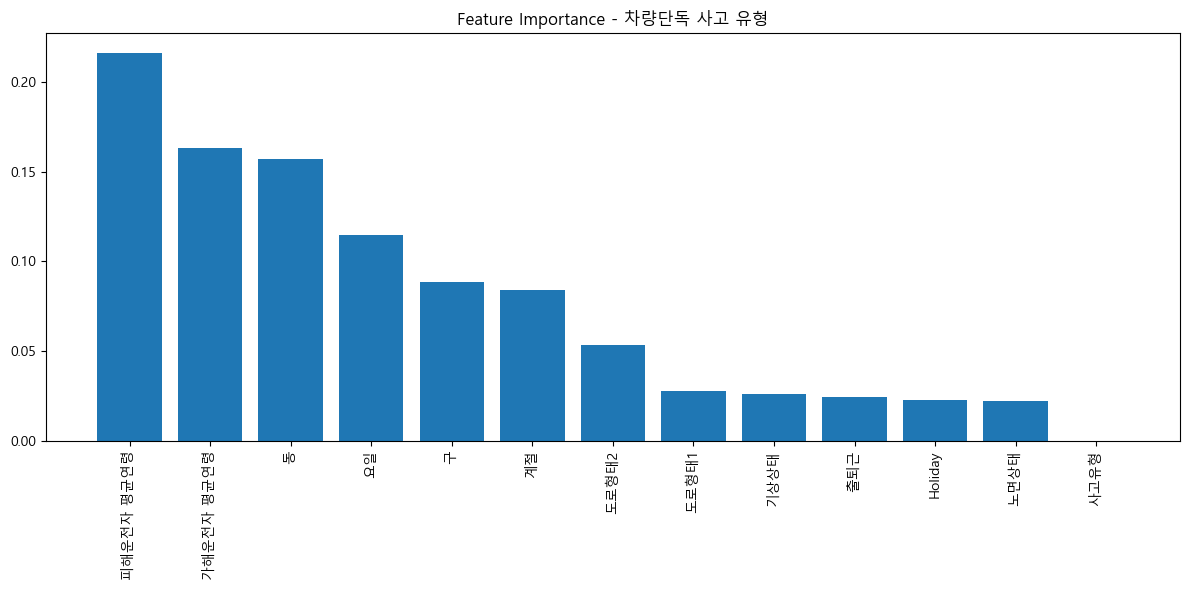

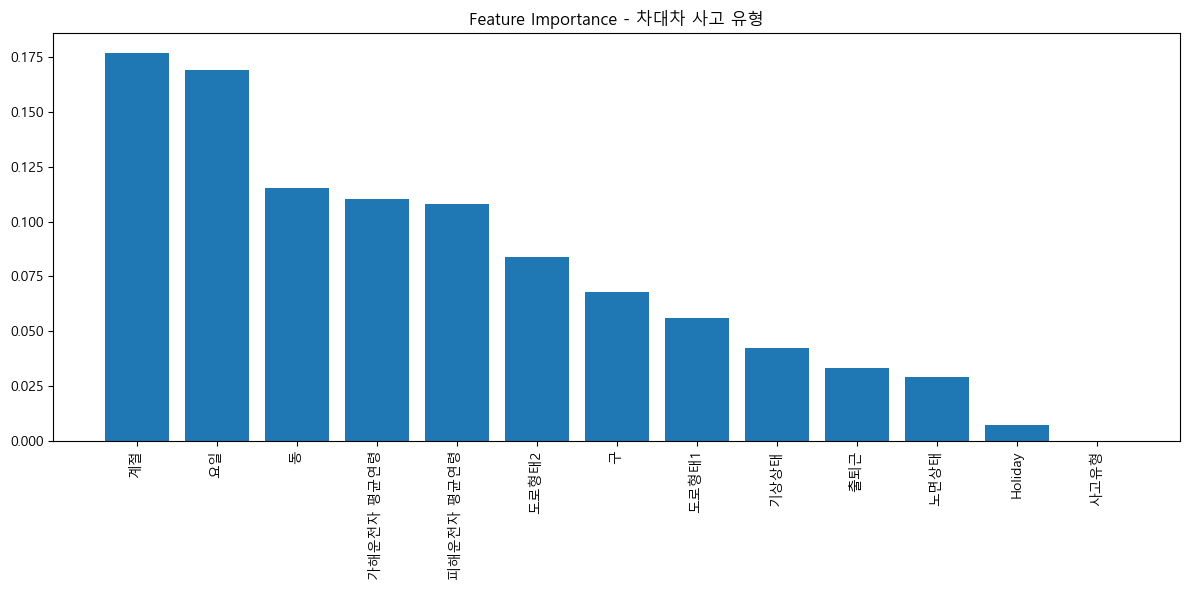

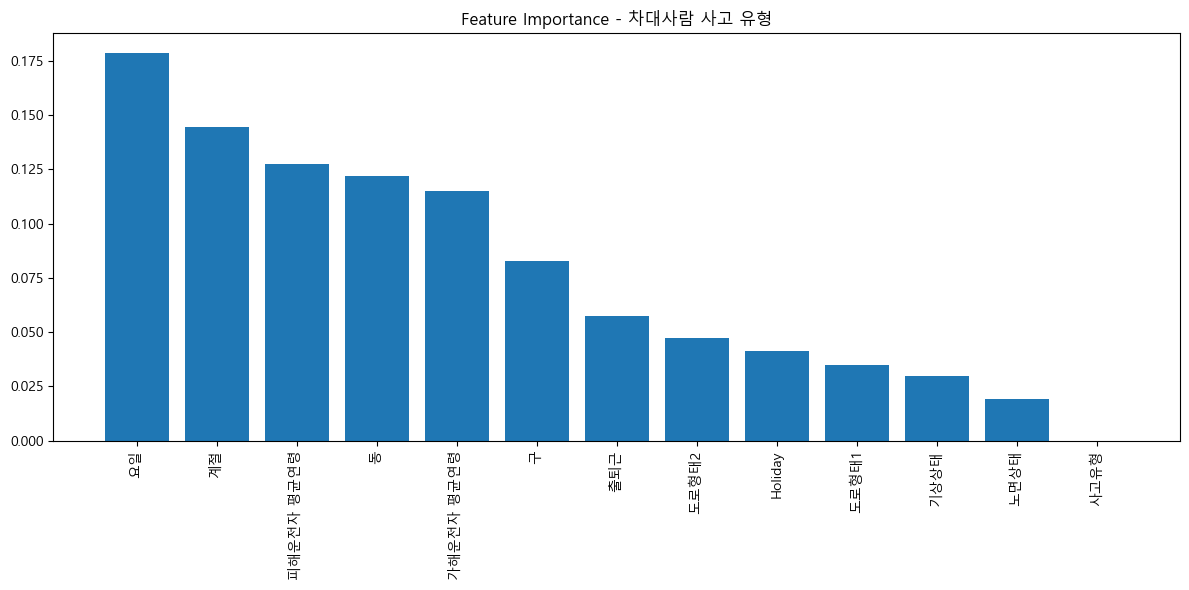

차량단독 사고 유형 (Test) - RMSLE: 0.4439232547775895, R²: -0.22604149063073598
차대차 사고 유형 (Test) - RMSLE: 0.4954561004383916, R²: -0.21101295543038456
차대사람 사고 유형 (Test) - RMSLE: 0.3693595845180827, R²: -0.16818276201853766


In [433]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt



# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 사고 유형별로 데이터셋 분할 및 샘플링
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람

test1 = test[test["사고유형"] == 2]
test2 = test[test["사고유형"] == 1]
test3 = test[test["사고유형"] == 0]
# test1 = test[test["사고유형"] == 2].sample(n=300, random_state=42)  # 차량단독
# test2 = test[test["사고유형"] == 1].sample(n=5000, random_state=42)  # 차대차
# test3 = test[test["사고유형"] == 0].sample(n=2000, random_state=42)  # 차대사람

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    rmsle_value = rmsle(y_test, y_pred_test)
    r2_value = r2_score(y_test, y_pred_test)

    return model, rmsle_value, r2_value

# 모델 학습 및 평가
model1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1)
model2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2)
model3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3)

print(f'차량단독 사고 유형 - RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1.loc[:, 'predict'] = model1.predict(X_test1)
test2.loc[:, 'predict'] = model2.predict(X_test2)
test3.loc[:, 'predict'] = model3.predict(X_test3)

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')
# 차량단독 사고 유형 - RMSLE: 0.40470011594412897, R²: -0.2324461316191424
# 차대차 사고 유형 - RMSLE: 0.4896821512249026, R²: -0.25520933939111745
# 차대사람 사고 유형 - RMSLE: 0.3615198425497484, R²: -0.16971634566501748

차량단독 사고 유형 - MSE: 5.016583738417033, MAE: 1.5515886321195145, RMSLE: 0.4439232547775895, R²: -0.22604149063073598
차대차 사고 유형 - MSE: 13.721369084433244, MAE: 2.303467273821735, RMSLE: 0.4954561004383916, R²: -0.21101295543038456
차대사람 사고 유형 - MSE: 3.734549802327127, MAE: 1.3128513518353442, RMSLE: 0.3693595845180827, R²: -0.16818276201853766


C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\1497182771.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.loc[:, 'predict'] = model1.predict(X_test1)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\1497182771.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.loc[:, 'predict'] = model2.predict(X_test2)
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\1497182771.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

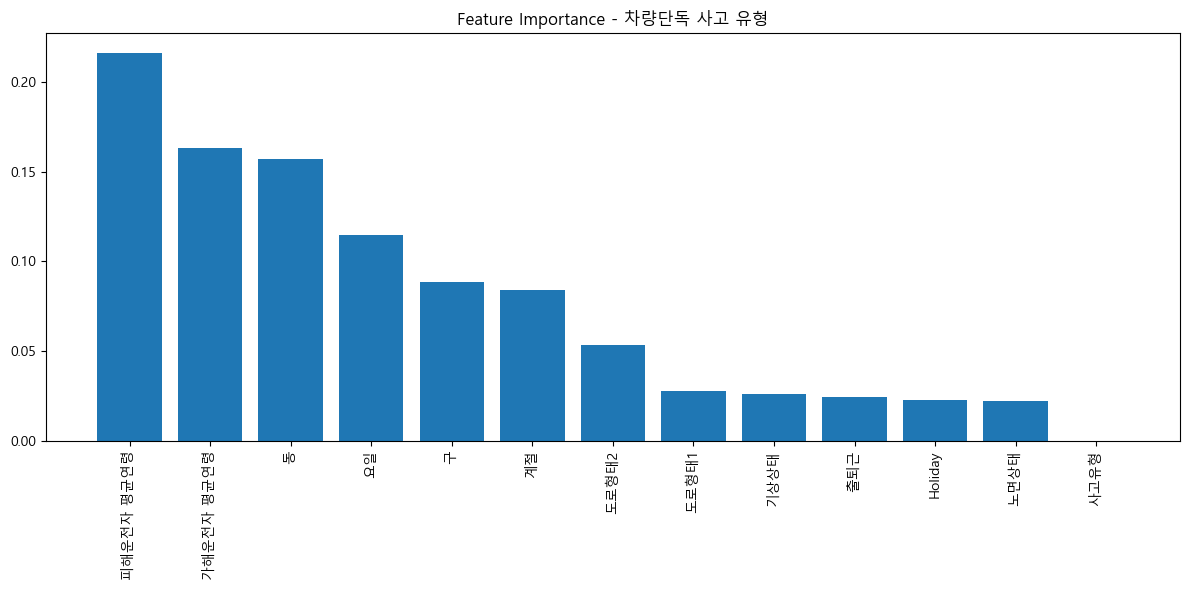

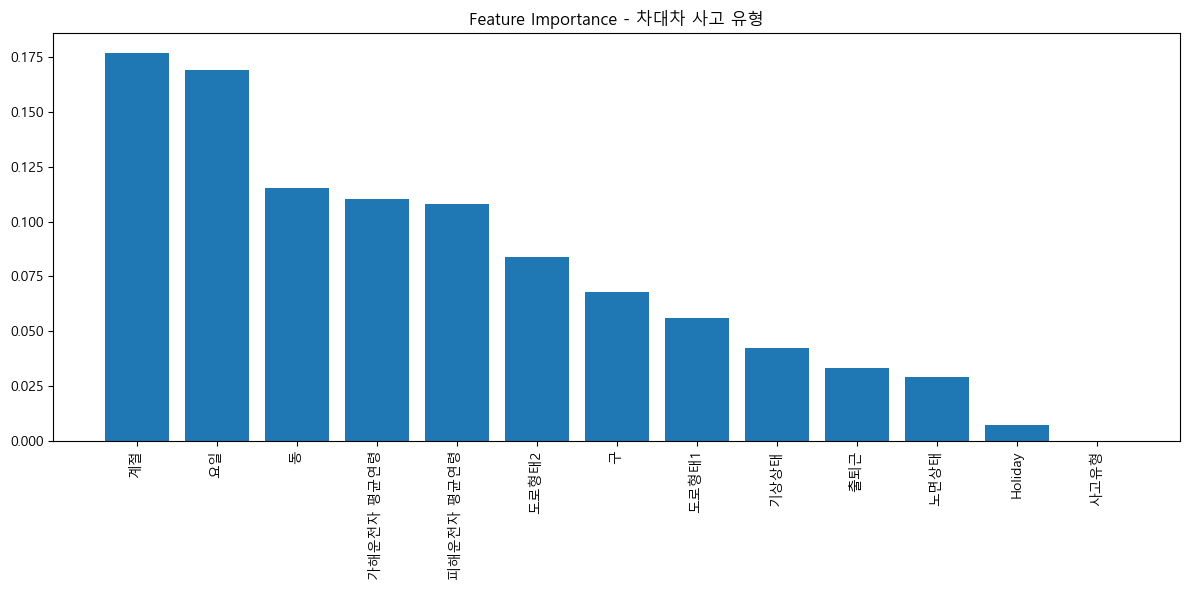

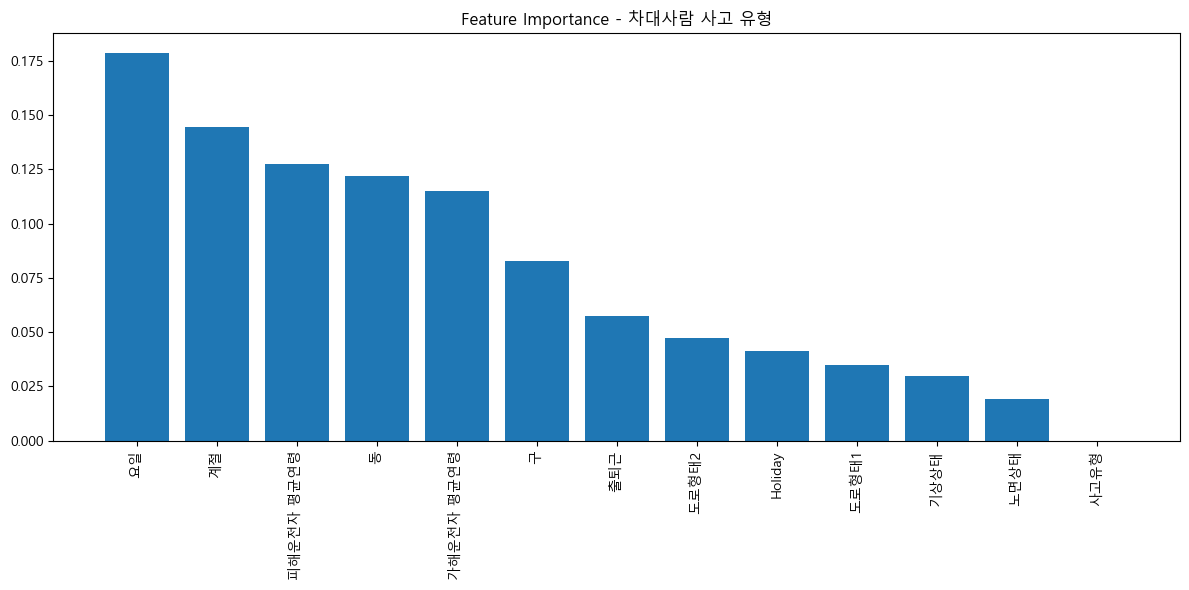

차량단독 사고 유형 (Test) - RMSLE: 0.4439232547775895, R²: -0.22604149063073598
차대차 사고 유형 (Test) - RMSLE: 0.4954561004383916, R²: -0.21101295543038456
차대사람 사고 유형 (Test) - RMSLE: 0.3693595845180827, R²: -0.16818276201853766


In [434]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import matplotlib.pyplot as plt

# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 사고 유형별로 데이터셋 분할 및 샘플링
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람

test1 = test[test["사고유형"] == 2]
test2 = test[test["사고유형"] == 1]
test3 = test[test["사고유형"] == 0]

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    mse_value = mean_squared_error(y_test, y_pred_test)
    mae_value = mean_absolute_error(y_test, y_pred_test)
    rmsle_value = rmsle(y_test, y_pred_test)
    r2_value = r2_score(y_test, y_pred_test)

    return model, mse_value, mae_value, rmsle_value, r2_value

# 모델 학습 및 평가
model1, mse1, mae1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1)
model2, mse2, mae2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2)
model3, mse3, mae3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3)

print(f'차량단독 사고 유형 - MSE: {mse1}, MAE: {mae1}, RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - MSE: {mse2}, MAE: {mae2}, RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - MSE: {mse3}, MAE: {mae3}, RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1.loc[:, 'predict'] = model1.predict(X_test1)
test2.loc[:, 'predict'] = model2.predict(X_test2)
test3.loc[:, 'predict'] = model3.predict(X_test3)

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')


차량단독 사고 유형 - MSE: 4.6110733640445405, MAE: 1.4118419657493806, RMSLE: 0.42271725291909434, R²: -0.1269356907903929
차대차 사고 유형 - MSE: 12.70276629353593, MAE: 2.1082489286471615, RMSLE: 0.47254852066547115, R²: -0.12111367725896427
차대사람 사고 유형 - MSE: 3.6212566955498966, MAE: 1.2572532870719317, RMSLE: 0.3626583060811071, R²: -0.1327442054593997


C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\2224510483.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1.loc[:, 'predict'] = np.expm1(model1.predict(X_test1))
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\2224510483.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2.loc[:, 'predict'] = np.expm1(model2.predict(X_test2))
C:\Users\thdfy\AppData\Local\Temp\ipykernel_22624\2224510483.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

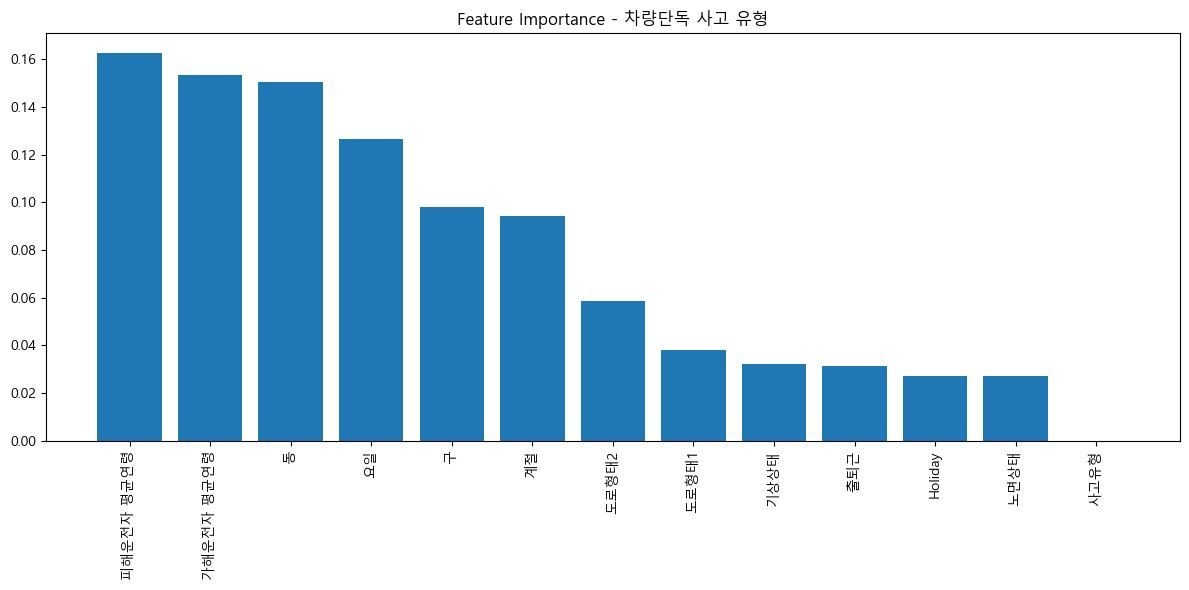

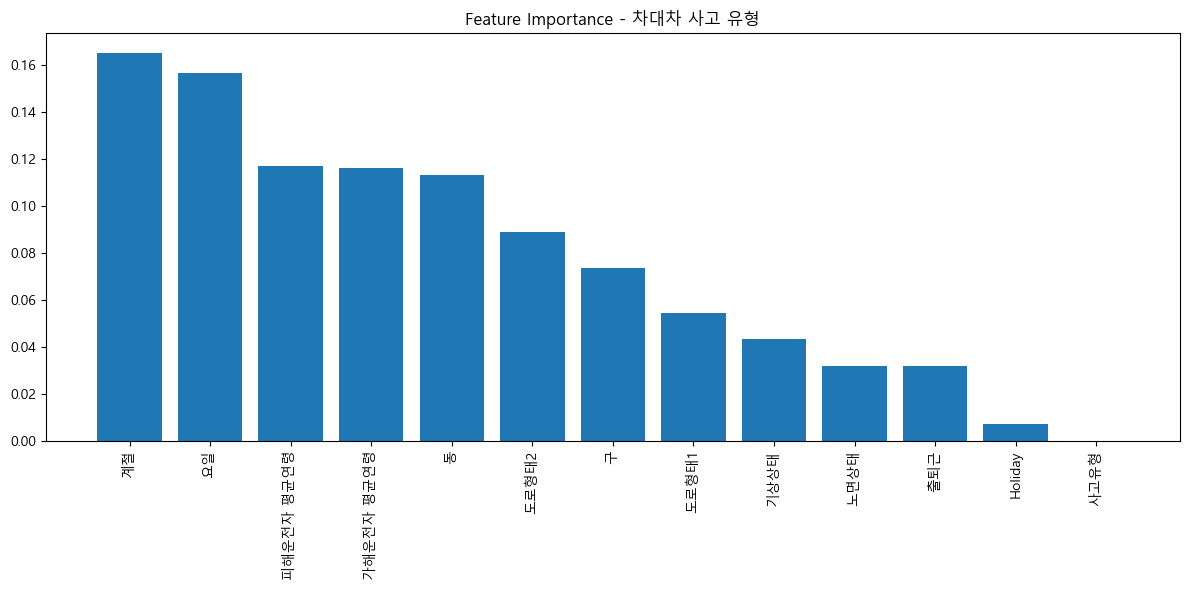

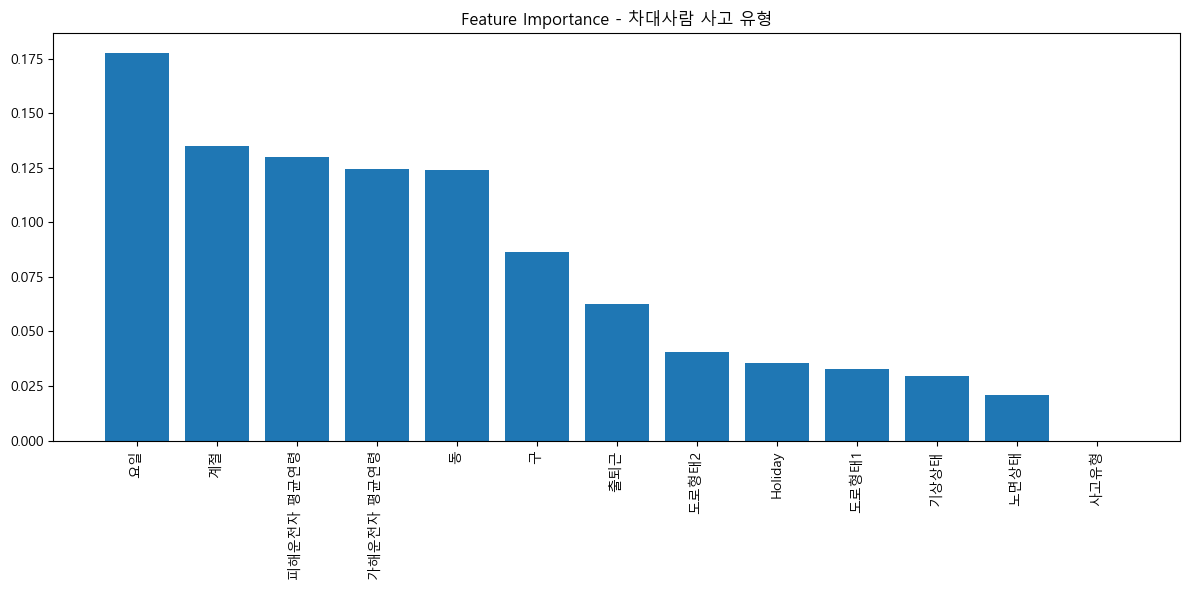

차량단독 사고 유형 (Test) - RMSLE: 0.6154604976461202, R²: -26.06481443576533
차대차 사고 유형 (Test) - RMSLE: 0.7332985601535423, R²: -45.838882418089774
차대사람 사고 유형 (Test) - RMSLE: 0.6331664055214483, R²: -41.97385828111346


In [435]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 로그 변환 적용 (ECLO 컬럼)
train['ECLO'] = np.log1p(train['ECLO'])
test['ECLO'] = np.log1p(test['ECLO'])

# 사고 유형별로 데이터셋 분할 및 샘플링
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람

test1 = test[test["사고유형"] == 2]
test2 = test[test["사고유형"] == 1]
test3 = test[test["사고유형"] == 0]

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # 로그 역변환
    y_test_exp = np.expm1(y_test)
    y_pred_test_exp = np.expm1(y_pred_test)

    mse_value = mean_squared_error(y_test_exp, y_pred_test_exp)
    mae_value = mean_absolute_error(y_test_exp, y_pred_test_exp)
    rmsle_value = rmsle(y_test_exp, y_pred_test_exp)
    r2_value = r2_score(y_test_exp, y_pred_test_exp)

    return model, mse_value, mae_value, rmsle_value, r2_value

# 모델 학습 및 평가
model1, mse1, mae1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1)
model2, mse2, mae2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2)
model3, mse3, mae3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3)

print(f'차량단독 사고 유형 - MSE: {mse1}, MAE: {mae1}, RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - MSE: {mse2}, MAE: {mae2}, RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - MSE: {mse3}, MAE: {mae3}, RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1.loc[:, 'predict'] = np.expm1(model1.predict(X_test1))
test2.loc[:, 'predict'] = np.expm1(model2.predict(X_test2))
test3.loc[:, 'predict'] = np.expm1(model3.predict(X_test3))

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')


In [436]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb


# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 사고 유형별로 데이터셋 분할
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람

test1 = test[test["사고유형"] == 2]  # 차량단독
test2 = test[test["사고유형"] == 1]  # 차대차
test3 = test[test["사고유형"] == 0]  # 차대사람

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    rmsle_value = rmsle(y_test, y_pred_test)
    r2_value = r2_score(y_test, y_pred_test)

    return model, rmsle_value, r2_value

# 모델 학습 및 평가
model1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1)
model2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2)
model3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3)

print(f'차량단독 사고 유형 - RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1.loc[:, 'predict'] = model1.predict(X_test1)
test2.loc[:, 'predict'] = model2.predict(X_test2)
test3.loc[:, 'predict'] = model3.predict(X_test3)

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')


SyntaxError: invalid syntax (432949488.py, line 20)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt


# 결측값 처리 (결측값이 있는 경우)
train = train.fillna(0)
test = test.fillna(0)

# 로그 변환 적용 (ECLO 컬럼)
train['ECLO'] = np.log1p(train['ECLO'])
test['ECLO'] = np.log1p(test['ECLO'])

# 사고 유형별로 데이터셋 분할 및 샘플링
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람

test1 = test[test["사고유형"] == 2]
test2 = test[test["사고유형"] == 1]
test3 = test[test["사고유형"] == 0]

# 데이터셋 분할 함수 정의
def split_data(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

X_train1, y_train1 = split_data(train1, 'ECLO')
X_train2, y_train2 = split_data(train2, 'ECLO')
X_train3, y_train3 = split_data(train3, 'ECLO')

X_test1, y_test1 = split_data(test1, 'ECLO')
X_test2, y_test2 = split_data(test2, 'ECLO')
X_test3, y_test3 = split_data(test3, 'ECLO')

# RMSLE 계산 함수 정의
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# XGBoost 모델 학습 및 평가 함수 정의
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = xgb.XGBRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='rmsle', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(X_test)

    # 로그 역변환
    y_test_exp = np.expm1(y_test)
    y_pred_test_exp = np.expm1(y_pred_test)

    mse_value = mean_squared_error(y_test_exp, y_pred_test_exp)
    mae_value = mean_absolute_error(y_test_exp, y_pred_test_exp)
    rmsle_value = rmsle(y_test_exp, y_pred_test_exp)
    r2_value = r2_score(y_test_exp, y_pred_test_exp)

    return best_model, mse_value, mae_value, rmsle_value, r2_value

# 모델 학습 및 평가
model1, mse1, mae1, rmsle1, r21 = train_and_evaluate(X_train1, y_train1, X_test1, y_test1)
model2, mse2, mae2, rmsle2, r22 = train_and_evaluate(X_train2, y_train2, X_test2, y_test2)
model3, mse3, mae3, rmsle3, r23 = train_and_evaluate(X_train3, y_train3, X_test3, y_test3)

print(f'차량단독 사고 유형 - MSE: {mse1}, MAE: {mae1}, RMSLE: {rmsle1}, R²: {r21}')
print(f'차대차 사고 유형 - MSE: {mse2}, MAE: {mae2}, RMSLE: {rmsle2}, R²: {r22}')
print(f'차대사람 사고 유형 - MSE: {mse3}, MAE: {mae3}, RMSLE: {rmsle3}, R²: {r23}')

# 예측값을 test 데이터프레임에 추가
test1.loc[:, 'predict'] = np.expm1(model1.predict(X_test1))
test2.loc[:, 'predict'] = np.expm1(model2.predict(X_test2))
test3.loc[:, 'predict'] = np.expm1(model3.predict(X_test3))

# Feature Importance 시각화
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance - {title}')
    plt.bar(range(X_train.shape[1]), importance[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(model1, X_train1, '차량단독 사고 유형')
plot_feature_importance(model2, X_train2, '차대차 사고 유형')
plot_feature_importance(model3, X_train3, '차대사람 사고 유형')

# RMSLE와 R² 값을 계산하여 출력
rmsle_test1 = rmsle(y_test1, test1['predict'])
r2_test1 = r2_score(y_test1, test1['predict'])
print(f'차량단독 사고 유형 (Test) - RMSLE: {rmsle_test1}, R²: {r2_test1}')

rmsle_test2 = rmsle(y_test2, test2['predict'])
r2_test2 = r2_score(y_test2, test2['predict'])
print(f'차대차 사고 유형 (Test) - RMSLE: {rmsle_test2}, R²: {r2_test2}')

rmsle_test3 = rmsle(y_test3, test3['predict'])
r2_test3 = r2_score(y_test3, test3['predict'])
print(f'차대사람 사고 유형 (Test) - RMSLE: {rmsle_test3}, R²: {r2_test3}')


InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'recall_micro', 'precision', 'neg_mean_squared_error', 'top_k_accuracy', 'neg_mean_absolute_percentage_error', 'jaccard', 'homogeneity_score', 'recall_weighted', 'accuracy', 'roc_auc_ovo', 'recall', 'adjusted_rand_score', 'positive_likelihood_ratio', 'neg_mean_poisson_deviance', 'adjusted_mutual_info_score', 'jaccard_macro', 'f1_weighted', 'max_error', 'neg_root_mean_squared_error', 'neg_negative_likelihood_ratio', 'precision_micro', 'balanced_accuracy', 'neg_median_absolute_error', 'neg_root_mean_squared_log_error', 'recall_macro', 'roc_auc_ovr', 'neg_brier_score', 'jaccard_samples', 'roc_auc_ovo_weighted', 'v_measure_score', 'jaccard_micro', 'mutual_info_score', 'neg_mean_squared_log_error', 'jaccard_weighted', 'average_precision', 'f1', 'f1_micro', 'r2', 'f1_samples', 'recall_samples', 'precision_weighted', 'matthews_corrcoef', 'precision_macro', 'neg_mean_gamma_deviance', 'normalized_mutual_info_score', 'neg_log_loss', 'rand_score', 'roc_auc_ovr_weighted', 'precision_samples', 'f1_macro', 'fowlkes_mallows_score', 'roc_auc', 'explained_variance', 'neg_mean_absolute_error', 'completeness_score'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'rmsle' instead.

In [ ]:
test1[['ECLO','predict']]

,ECLO,predict
10,0.869742,1.440047
13,0.869742,1.443601
17,0.869742,1.450691
59,1.194706,1.441010
79,0.869742,1.447768
...,...,...
33476,1.026672,1.428364
33489,0.526589,1.436643
33518,0.869742,1.455212
33620,0.869742,1.429624


In [ ]:
train['ECLO'].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1        10
2         1
3         6
4         5
         ..
33693     3
33694     3
33695     1
33696     3
33697     6
Name: ECLO, Length: 33698, dtype: int64>

In [ ]:
test1[['ECLO','predict']]
test2[['ECLO','predict']]
test3[['ECLO','predict']]

,ECLO,predict
10,3,4.068886
13,3,3.336643
17,3,2.402504
59,9,4.139050
79,3,3.772724
...,...,...
33476,5,3.326353
33489,1,4.162469
33518,3,3.289004
33620,3,4.538691


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, r2_score

# 실제 값과 예측 값
y_true = np.array([1, 10, 100, 1000, 10000])
y_pred = np.array([10, 20, 30, 40, 50])  # 예측값이 실제값과 크게 차이나도록 설정

# RMSLE 계산
rmsle_value = np.sqrt(mean_squared_log_error(y_true, y_pred))

# R² 계산
r2_value = r2_score(y_true, y_pred)

print(f'RMSLE: {rmsle_value}')
print(f'R²: {r2_value}')


RMSLE: 2.9254857623854145
R²: -0.30935770835695786


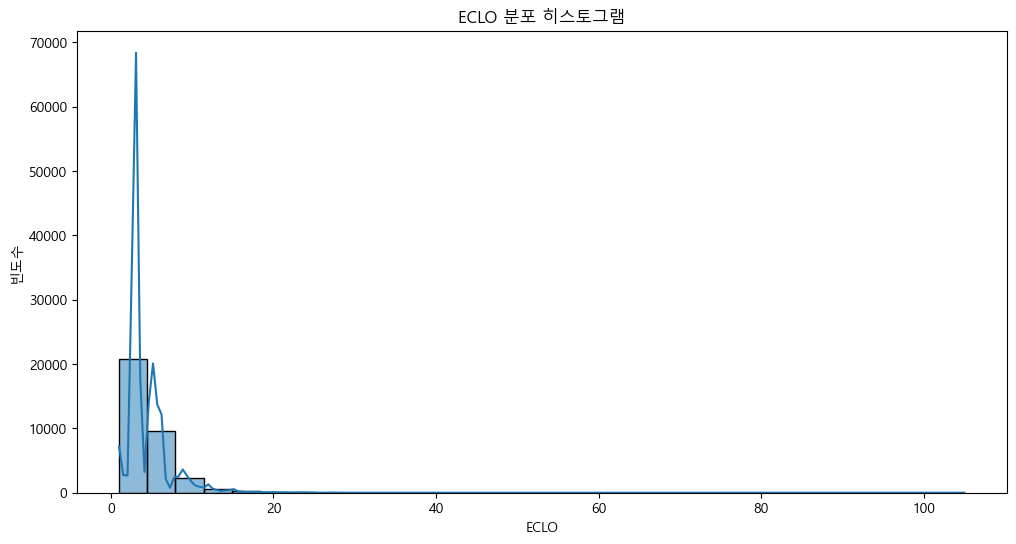

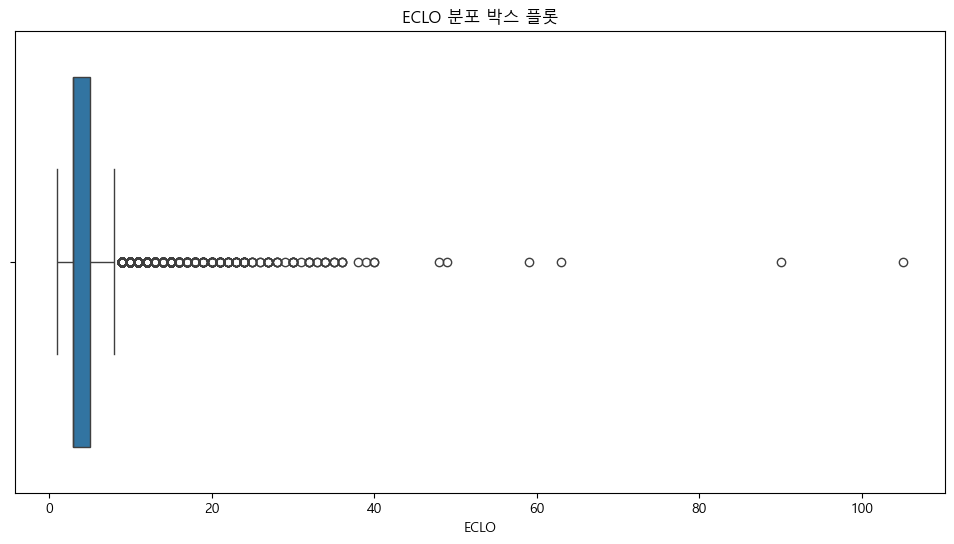

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ECLO 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(train['ECLO'], bins=30, kde=True)
plt.title('ECLO 분포 히스토그램')
plt.xlabel('ECLO')
plt.ylabel('빈도수')
plt.show()

# ECLO 분포 박스 플롯
plt.figure(figsize=(12, 6))
sns.boxplot(x=train['ECLO'])
plt.title('ECLO 분포 박스 플롯')
plt.xlabel('ECLO')
plt.show()


In [ ]:
train1 = train[train["사고유형"] == 2]  # 차량단독
train2 = train[train["사고유형"] == 1]  # 차대차
train3 = train[train["사고유형"] == 0]  # 차대사람


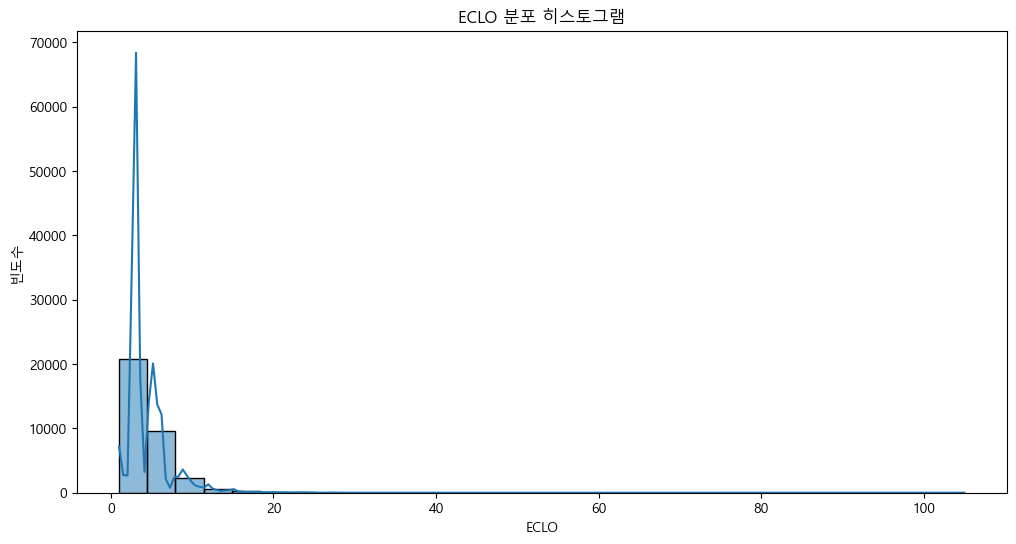

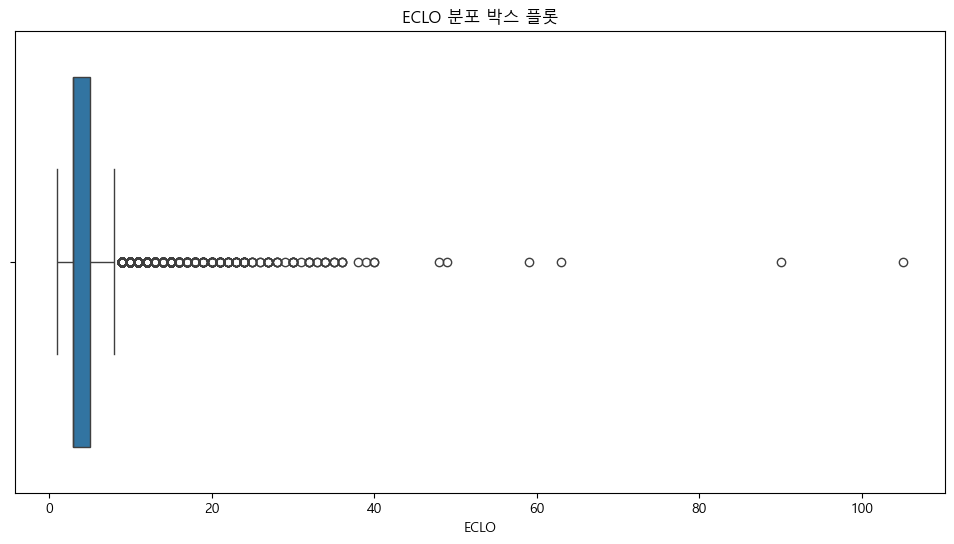

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ECLO 분포 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(train['ECLO'], bins=30, kde=True)
plt.title('ECLO 분포 히스토그램')
plt.xlabel('ECLO')
plt.ylabel('빈도수')
plt.show()

# ECLO 분포 박스 플롯
plt.figure(figsize=(12, 6))
sns.boxplot(x=train['ECLO'])
plt.title('ECLO 분포 박스 플롯')
plt.xlabel('ECLO')
plt.show()
